In [2]:
from math import exp
from math import sqrt
from math import log
from math import cos as cosine
import cmath
import numpy as np
import sympy
import matplotlib.pyplot as plt

Problem 1:

In [4]:

def quad_formula(a: float, b: float, c: float, tolerance: float = 10**-10) -> tuple:
    '''
    Quadratic formula to avoid large round off errors. Cannot handle imaginary numbers
    '''
    q1: float = -b
    q2: float = b * b
    q3: float = 4.*a*c
    q4: float = 2.*a

    x1, x2 = None, None 

    if (q2 - q3) >= 0.:
        # real solutions
        if (q1 + sqrt(q2 - q3)) <= tolerance:
            # values are too similar
            x1 = (2.*c) / (q1 - sqrt(q2 - q3))
        else:
            x1 = (q1 + sqrt(q1 - q3)) / q4

        if (q1 - sqrt(q2 - q3)) <= tolerance:
            x2 = (2.*c) / (q1 + sqrt(q2 - q3))
        else:
            x2 = (q1 - sqrt(q2 - q3)) / q4

    return x1, x2

a, b, c = 1.6*10**-4, 1.5*10**4, 1.3*10**-4
print(f"a = {a}, b = {b}, c = {c}")
roots: tuple = quad_formula(a, b, c)
print(f"x1 = {roots[0]}, x2 = {roots[1]}")

print(f"\n")

a, b, c = 1.6*10**-4, -1.4*10**4, 1.3*10**-4
# a, b, c = 10**-4, -10**4, 10**-4
print(f"a = {a}, b = {b}, c = {c}")
roots: tuple = quad_formula(a, b, c)
print(f"x1 = {roots[0]}, x2 = {roots[1]}")

a = 0.00016, b = 15000.0, c = 0.00013000000000000002
x1 = -8.666666666666668e-09, x2 = -71468255.80544001


a = 0.00016, b = -14000.0, c = 0.00013000000000000002
x1 = 44119754.986442626, x2 = 9.285714285714288e-09


Problem 2

0.146559155107567*x**3 - 0.688053189464412*x**2 + 0.0817963402249846*x + 1.0


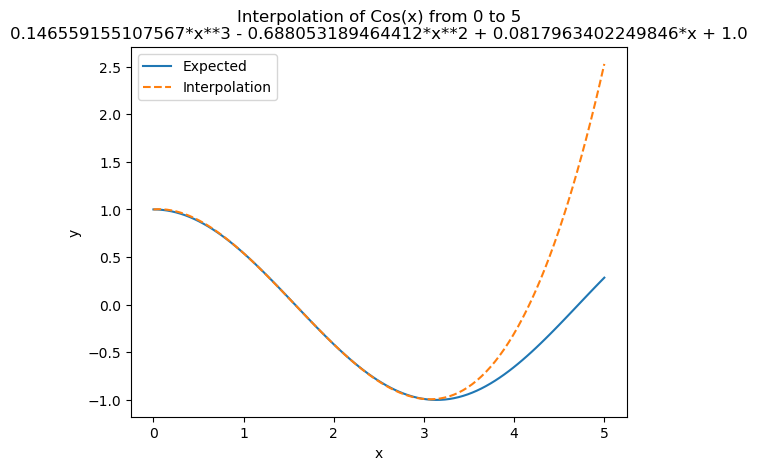

In [10]:
def Lagrangian_Basis(point: float, jndex: int, x_points: list or np.array) -> float:
    '''
    Numerical method for determining a lagrangian polynomial. This step computes the 
    Big Pi[(x - xk)/(xj - xk)]
    '''

    base = 1.

    for kndex in range(len(x_points)):
        if kndex != jndex:
            base *= (point - x_points[kndex]) / (x_points[jndex] - x_points[kndex])

    return base


def Lagrangian_Fit(data_points: list or np.array or dict or tuple, points = 100) -> dict:
    '''
    data points can be a numpy array, dictionary, list, or tuple. If anything other then a dictionary the x points are
    interpreted to be 0, 1, 2, 3, etc. while the input list is taken as the correspoding y points.

    Does a numerical interportional. This isn't used in the homework as it does a numerical method bound by the input
    x points (so if you put in from 0 to 3, it will only output from 0 to 3).
    '''
    if isinstance(data_points, dict):
        x = np.array([x for x in data_points.keys()])
        y = np.array([y for y in data_points.values()])
    else:
        x = np.array([x for x in range(len(data_points))])
        if isinstance(data_points, (list, tuple)):
            y = np.array(data_points)

    x_points = np.linspace(x[0], x[len(x) - 1], points)

    fit = {}

    for point in x_points:

        interpolation = 0.
        for j, weight in enumerate(y):
            interpolation += weight * Lagrangian_Basis(point, j, x)
            
        fit[point] = interpolation    

    return fit


def Lagrangian_Coefficents(data_points: list or np.array or dict or tuple) -> sympy.core.add:
    '''
    Uses sympy to find the coefficents. Returns a symbolic function that must be lambdafied. That
    step is done seperately so that the polynomial can be seen.
    '''

    if isinstance(data_points, dict):
        x_points = np.array([x for x in data_points.keys()])
        y_points = np.array([y for y in data_points.values()])
    else:
        x_points = np.array([x for x in range(len(data_points))])
        if isinstance(data_points, (list, tuple)):
            y_points = np.array(data_points)

    x = sympy.Symbol("x")

    poly_fit = 0
    for j, weight in enumerate(y_points):

        p = 1.
        for k, x_point in enumerate(x_points):
            if j != k:
                p *= (x - x_points[k]) / (x_points[j] - x_points[k])

        poly_fit += sympy.simplify(weight*p)

    poly_fit = sympy.simplify(poly_fit)

    return poly_fit


f = lambda x: cosine(x)

cos = {0:  1.,
        1:  0.5403023058681398,
        2: -0.4161468365471424,
        3: -0.9899924966004454}

poly_fit = Lagrangian_Coefficents(cos)  # finds an algebraic expression for the polynomial
print(poly_fit)
poly_fit_for_title = str(poly_fit)
poly_fit = sympy.lambdify(sympy.Symbol("x"), poly_fit)

x_expected = np.linspace(0, 5, 100)
expected = {x: f(x) for x in x_expected}

interportional = {x:poly_fit(x) for x in x_expected}

plt.title(f"Interpolation of Cos(x) from 0 to 5\n{poly_fit_for_title}")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(expected.keys(), expected.values(), label = "Expected")
plt.plot(interportional.keys(), interportional.values(), "--", label = "Interpolation")
plt.legend()
plt.show()


Problem 3

Inital function: $ x/2 = exp(1 - x^2) $

Function for relaxation method: $ x = \sqrt{1 + log(2) - log(x)} $

In [12]:
def bisectional_method(f, lBoundary: int or float, rBoundary: int or float, tolerance: float = 10**-10, iterations = 10**9, 
                            *args, **kwargs) -> float:
    '''
    Takes a function and finds the roots. Args and Kwargs are used for additional inputs to the function
    '''

    fLeft = f(lBoundary, *args, **kwargs)
    fRight = f(rBoundary, *args, **kwargs)

    if (fLeft * fRight) > 0.:
        print("Unable to find roots: points must be on opposite site of y axis")
        print(f"f({lBoundary}) = {fLeft}, f({rBoundary}) = {fRight}")
        return None


    for i in range(iterations):
        midpoint = (lBoundary + rBoundary) / 2.

        fMidpoint = f(midpoint, *args, **kwargs)

        if (fMidpoint * fRight) < 0.:
            lBoundary, fLeft = midpoint, fMidpoint

        else:
            rBoundary, fRight = midpoint, fMidpoint

        if (rBoundary - lBoundary) < tolerance:
            # print(i)
            # print(rBoundary - lBoundary)
            return midpoint

    else:
        print(f"Failed to find root after {iterations} attempts")



def relaxation_method(f, guess: int or float, tolerance: float = 10**-10, max_iterations = 200, 
                      *args, **kwargs) -> float:
    '''
    Relaxation method for finding roots.

    Takes a function as an input (f), an inital guess (int or float), and will return a float for the root.

    Will, by default, only do 200 iterations, but can be adjusted. Tolerance for success if 10**-10 by default.

    Args and kwargs are used for additional inputs of the function.
    '''
    xprev = xnext = guess

    for _ in range(max_iterations):
        xprev = xnext
        xnext = f(xprev, *args, **kwargs)

        if (abs(xnext - xprev) < tolerance):
            return xnext

    else:
        print(f"Failed to converge after {max_iterations} iterations")
        print(f"Values are:\n\tInitial guess = {guess}\n\tXprevious = {xprev}\n\tXnext = {xnext}\n\tError = {abs(xnext - xprev)}")

        return xnext



f = lambda x: -(x/2) + exp(1 - x**2)
fln = lambda x: sqrt(-log(x) + log(2) + 1)

root_bi = bisectional_method(f, 1, 2)
print(f"Root = {root_bi} using the Bisectional Method")
root_re = relaxation_method(fln, 1.0)
print(f"Root = {root_re} using the Relaxation Method")

Root = 1.2218082032050006 using the Bisectional Method
Root = 1.2218082031982127 using the Relaxation Method
